# GISTIC copy number analysis between TCGA-LGG and TCGA-GBM
10 Oct. 2024

# 1. Import datas

In [2]:
import pandas as pd

In [3]:
df_gbm = pd.read_csv('GBM_all_thresholded.by_genes.txt', sep='\t', index_col=0)
df_lgg = pd.read_csv('LGG_all_thresholded.by_genes.txt', sep='\t', index_col=0)

df_gbm = df_gbm.drop(df_gbm.columns[[0, 1]], axis = 1)
df_lgg = df_lgg.drop(df_lgg.columns[[0, 1]], axis = 1)

In [4]:
df_gbm.head(3)

,TCGA-02-0001-01,TCGA-02-0003-01,TCGA-02-0006-01,TCGA-02-0007-01,TCGA-02-0009-01,TCGA-02-0010-01,TCGA-02-0011-01,TCGA-02-0014-01,TCGA-02-0015-01,TCGA-02-0016-01,...,TCGA-76-6662-01,TCGA-76-6663-01,TCGA-76-6664-01,TCGA-81-5910-01,TCGA-81-5911-01,TCGA-87-5896-01,TCGA-OX-A56R-01,TCGA-RR-A6KA-01,TCGA-RR-A6KB-01,TCGA-RR-A6KC-01
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,1,0,0,0,0,-1,0,0,-1,-1,...,0,0,0,0,0,-1,1,0,0,0
ACTRT2,1,0,0,0,0,-1,0,0,-1,-1,...,0,0,0,0,0,-1,1,0,0,0
AGRN,1,0,0,0,0,-1,0,0,-1,-1,...,0,0,0,0,0,-1,1,0,0,0


In [5]:
df_lgg.head(3)

,TCGA-CS-4938-01,TCGA-CS-4941-01,TCGA-CS-4942-01,TCGA-CS-4943-01,TCGA-CS-4944-01,TCGA-CS-5390-01,TCGA-CS-5393-01,TCGA-CS-5394-01,TCGA-CS-5395-01,TCGA-CS-5396-01,...,TCGA-VW-A8FI-01,TCGA-W9-A837-01,TCGA-WH-A86K-01,TCGA-WY-A858-01,TCGA-WY-A859-01,TCGA-WY-A85A-01,TCGA-WY-A85B-01,TCGA-WY-A85C-01,TCGA-WY-A85D-01,TCGA-WY-A85E-01
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
ACAP3,0,1,0,0,0,-1,0,-1,0,-1,...,0,-1,0,0,0,0,0,0,0,0
ACTRT2,0,1,0,0,0,-1,0,-1,0,-1,...,0,-1,0,0,0,0,0,0,0,0
AGRN,0,1,0,0,0,-1,0,-1,0,-1,...,0,-1,0,0,0,0,0,0,0,0


# 2. Make statistic dataframe

In [6]:
# def count_values(row):
#     return{
#         '-2': (row == -2).sum(),
#         '-1': (row == -1).sum(),
#         '0': (row == 0).sum(),
#         '1': (row == 1).sum(),
#         '2': (row == 2).sum()
#     }

def count_values(row):
    return{
        'Del': ((row == -2) | (row == -1)).sum(),
        'Diploid': (row == 0).sum(),
        'Gain': ((row == 1) | (row == 2)).sum(),
    }

In [7]:
df_gbm_counts = df_gbm.apply(count_values, axis=1, result_type='expand')
df_gbm_counts['total'] = df_gbm_counts.sum(axis=1)

df_lgg_counts = df_lgg.apply(count_values, axis=1, result_type='expand')
df_lgg_counts['total'] = df_lgg_counts.sum(axis=1)

In [8]:
df_gbm_counts

,Del,Diploid,Gain,total
Gene Symbol,,,,
ACAP3,90,411,81,582
ACTRT2,90,411,81,582
AGRN,90,411,81,582
ANKRD65,90,411,81,582
ATAD3A,90,411,81,582
...,...,...,...,...
SYCE3,222,335,25,582
TRABD,222,335,25,582
TUBGCP6,222,335,25,582


In [9]:
df_lgg_counts

,Del,Diploid,Gain,total
Gene Symbol,,,,
ACAP3,199,300,12,511
ACTRT2,199,300,12,511
AGRN,199,300,12,511
ANKRD65,199,300,12,511
ATAD3A,199,300,12,511
...,...,...,...,...
SYCE3,78,408,25,511
TRABD,78,408,25,511
TUBGCP6,78,408,25,511


In [10]:
df_gbm_percentages = df_gbm_counts.div(df_gbm_counts['total'], axis=0)
df_lgg_percentages = df_lgg_counts.div(df_lgg_counts['total'], axis=0)

df_gbm_percentages = (df_gbm_percentages * 100).round(2)
df_lgg_percentages = (df_lgg_percentages * 100).round(2)

In [11]:
df_gbm_percentages

,Del,Diploid,Gain,total
Gene Symbol,,,,
ACAP3,15.46,70.62,13.92,100.0
ACTRT2,15.46,70.62,13.92,100.0
AGRN,15.46,70.62,13.92,100.0
ANKRD65,15.46,70.62,13.92,100.0
ATAD3A,15.46,70.62,13.92,100.0
...,...,...,...,...
SYCE3,38.14,57.56,4.30,100.0
TRABD,38.14,57.56,4.30,100.0
TUBGCP6,38.14,57.56,4.30,100.0


In [12]:
df_lgg_percentages

,Del,Diploid,Gain,total
Gene Symbol,,,,
ACAP3,38.94,58.71,2.35,100.0
ACTRT2,38.94,58.71,2.35,100.0
AGRN,38.94,58.71,2.35,100.0
ANKRD65,38.94,58.71,2.35,100.0
ATAD3A,38.94,58.71,2.35,100.0
...,...,...,...,...
SYCE3,15.26,79.84,4.89,100.0
TRABD,15.26,79.84,4.89,100.0
TUBGCP6,15.26,79.84,4.89,100.0


# Certification by paper data

In [13]:
print(df_gbm_percentages.loc['FGL2'])

Del          1.03
Diploid     16.67
Gain        82.30
total      100.00
Name: FGL2, dtype: float64


In [14]:
print(df_lgg_percentages.loc['FGL2'])

Del          1.17
Diploid     73.39
Gain        25.44
total      100.00
Name: FGL2, dtype: float64


# Diploid-diploid, gain-gain

In [15]:
df_diff = pd.DataFrame({
    'Del_diff': df_gbm_percentages['Del'] - df_lgg_percentages['Del'],
    'Diploid_diff': df_gbm_percentages['Diploid'] - df_lgg_percentages['Diploid'],
    'Gain_diff': df_gbm_percentages['Gain'] - df_lgg_percentages['Gain']
})

In [16]:
# Certification by published data
df_diff.loc['FGL2']

Del_diff        -0.14
Diploid_diff   -56.72
Gain_diff       56.86
Name: FGL2, dtype: float64

In [17]:
df_diff

,Del_diff,Diploid_diff,Gain_diff
Gene Symbol,,,
1/2-SBSRNA4,-9.92,6.65,3.27
A1BG,-37.85,9.92,27.93
A1BG-AS1,-37.85,9.92,27.93
A1CF,66.82,-65.39,-1.44
A2LD1,9.13,-10.35,1.21
...,...,...,...
hsa-mir-95,-1.08,-2.21,3.30
hsa-mir-96,-0.09,-48.43,48.52
hsa-mir-99a,1.09,-7.65,6.58


# Visualization

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

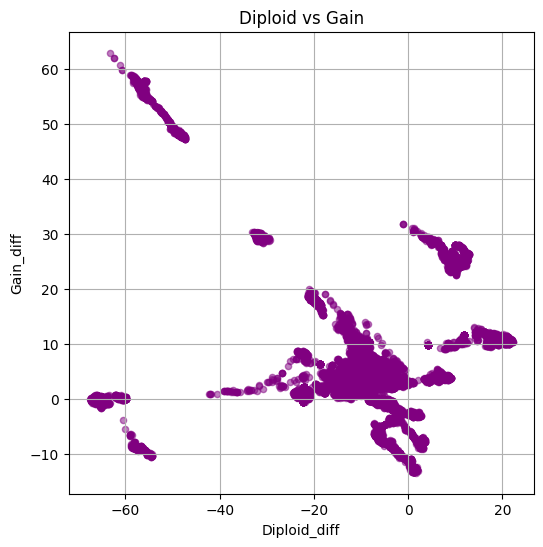

In [21]:
plt.figure(figsize = (6, 6))
plt.scatter(
    x = df_diff['Diploid_diff'],
    y = df_diff['Gain_diff'],
    alpha=0.5,
    color = 'purple',
    s = 20
)
plt.title('Diploid vs Gain')
plt.xlabel('Diploid_diff')
plt.ylabel('Gain_diff')

# plt.xlim(-80, 80)
# plt.ylim(-80, 80)

plt.grid(True)
plt.show()

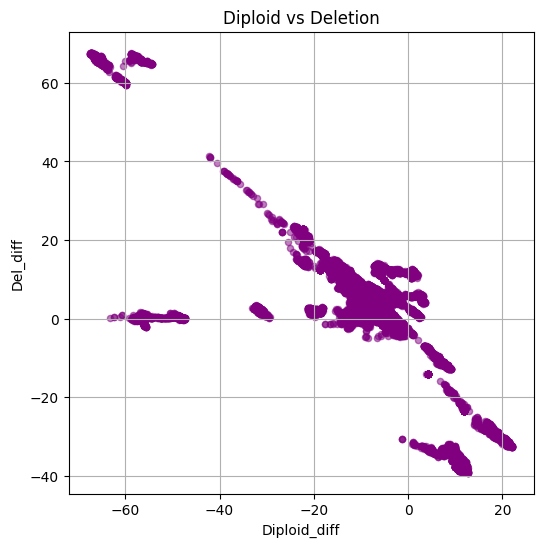

In [22]:
plt.figure(figsize = (6, 6))
plt.scatter(
    x = df_diff['Diploid_diff'],
    y = df_diff['Del_diff'],
    alpha=0.5,
    color = 'purple',
    s = 20
)
plt.title('Diploid vs Deletion')
plt.xlabel('Diploid_diff')
plt.ylabel('Del_diff')

# plt.xlim(-80, 80)
# plt.ylim(-80, 80)

plt.grid(True)
plt.show()

In [23]:
fig = px.scatter_3d(
    df_diff,
    x = 'Diploid_diff',
    y = 'Del_diff',
    z = 'Gain_diff',
    title = 'Diploid vs Gain vs Deletion',
    labels = {'Diploid_diff': 'Diploid_diff', 'Del_diff': 'Del_diff', 'Gain_diff': 'Gain_diff'},
    size_max = 1,
    # color_discrete_sequence
)

In [24]:
fig.show()

In [25]:
# save
fig.write_html('3d_plot.html')

# Geneset extraction

### Gain geneset (Diploid -> Gain)

In [129]:
gain_geneset = df_diff[df_diff['Gain_diff'] > 40]
del_geneset = df_diff[df_diff['Del_diff'] > 50]


In [ ]:
gain_geneset

In [ ]:
del_geneset

# Save the genesets to excel

In [133]:
gain_geneset.to_excel('gain_geneset.xlsx')
del_geneset.to_excel('del_geneset.xlsx')

In [ ]:
import requests

# 유전자에 대한 정보 요청
uniprot_id = "P53_HUMAN"  # TP53 단백질의 UniProt ID 예시
url = f"https://www.uniprot.org/uniprot/{uniprot_id}.txt"
response = requests.get(url)

# 데이터 출력
print(response.text)


In [ ]:
from Bio import Entrez

# NCBI의 API 사용을 위해 이메일 설정 (필수)
Entrez.email = "jangsungwoo617@gmail.com"

# 유전자 목록 예시
genes = ["TP53", "EGFR", "BRCA1"]

def fetch_gene_info(gene_name):
    # 유전자 이름으로 NCBI Gene 데이터베이스에서 검색
    handle = Entrez.esearch(db="gene", term=gene_name, retmax=1)
    record = Entrez.read(handle)
    gene_ids = record["IdList"]
    handle.close()

    # 유전자의 ID를 찾지 못한 경우 처리
    if not gene_ids:
        return f"No gene information found for {gene_name}."

    gene_id = gene_ids[0]

    # 유전자 ID를 사용하여 상세 정보 가져오기
    handle = Entrez.efetch(db="gene", id=gene_id, retmode="xml")
    records = Entrez.read(handle)
    handle.close()

    # 가져온 정보에서 단백질 특징 추출
    gene_info = records[0]
    summary = gene_info.get("Entrezgene_summary", "No summary available")
    protein_info = gene_info['Entrezgene_locus'][0]['Gene-commentary_products'][0]['Gene-commentary_text']

    return {
        "Gene": gene_name,
        "Gene ID": gene_id,
        "Summary": summary,
        "Protein Info": protein_info,
    }

# 유전자 정보 가져오기
for gene in genes:
    info = fetch_gene_info(gene)
    print(info)
